# Notebook 03: Vectorization Techniques

## Learning Objectives
By the end of this session, you will:
1. **Understand text vectorization** - Convert text to numerical representations
2. **Master Bag-of-Words (BoW)** - Build document-term matrices
3. **Implement TF-IDF** - Weight terms by importance
4. **Extract n-grams** - Capture phrase-level patterns
5. **Visualize text features** - Analyze word frequencies and importance
6. **Compare vectorization methods** - Choose the right approach for your task

## Why Vectorize Text?
Machine learning algorithms work with numbers, not text. We need to convert text into numerical vectors while preserving semantic meaning.


In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Sample documents for vectorization
documents = [
    "I love machine learning and natural language processing",
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing helps computers understand human language",
    "Deep learning is a powerful machine learning technique",
    "Python is great for machine learning and data science",
    "Text mining and natural language processing are related fields",
    "Artificial intelligence will transform many industries",
    "Data science combines statistics, programming, and domain knowledge"
]
# Add new sample documents
new_documents = [
    "Computers can learn from data using machine learning algorithms",
    "Language models like GPT-3 are trained on massive datasets",
    "Programming in Python is fun and productive",
    "Understanding context is key in NLP and AI applications"
]

# Merge with existing documents
documents = documents + new_documents

print("Sample Documents for Vectorization:")
print("=" * 50)
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

# Create a simple preprocessing function
def simple_preprocess(text):
    """Basic text preprocessing for vectorization"""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess documents
processed_docs = [simple_preprocess(doc) for doc in documents]
print(f"\nPreprocessed Documents:")
for i, doc in enumerate(processed_docs, 1):
    print(f"{i}. {doc}")

Sample Documents for Vectorization:
1. I love machine learning and natural language processing
2. Machine learning is a subset of artificial intelligence
3. Natural language processing helps computers understand human language
4. Deep learning is a powerful machine learning technique
5. Python is great for machine learning and data science
6. Text mining and natural language processing are related fields
7. Artificial intelligence will transform many industries
8. Data science combines statistics, programming, and domain knowledge
9. Computers can learn from data using machine learning algorithms
10. Language models like GPT-3 are trained on massive datasets
11. Programming in Python is fun and productive
12. Understanding context is key in NLP and AI applications

Preprocessed Documents:
1. i love machine learning and natural language processing
2. machine learning is a subset of artificial intelligence
3. natural language processing helps computers understand human language
4. deep l

## Section 1: Bag-of-Words (BoW) Representation

### Concept
Bag-of-Words represents each document as a vector of word counts, ignoring grammar and word order but keeping track of frequency.

**Example**: "I love NLP" → [1, 1, 1, 0, 0, ...] for vocabulary [I, love, NLP, machine, learning, ...]

### Advantages:
- Simple to understand and implement
- Works well for many text classification tasks
- Captures word importance through frequency

### Disadvantages:
- Loses word order and grammar
- Sparse vectors (mostly zeros)
- No semantic understanding

BAG-OF-WORDS ANALYSIS
Vocabulary size: 25
Matrix shape: (12, 25)
Matrix density: 0.243
['i love machine learning and natural language processing', 'machine learning is a subset of artificial intelligence', 'natural language processing helps computers understand human language', 'deep learning is a powerful machine learning technique', 'python is great for machine learning and data science', 'text mining and natural language processing are related fields', 'artificial intelligence will transform many industries', 'data science combines statistics programming and domain knowledge', 'computers can learn from data using machine learning algorithms', 'language models like gpt3 are trained on massive datasets', 'programming in python is fun and productive', 'understanding context is key in nlp and ai applications']

First 10 features:
        and  and natural  are  artificial  artificial intelligence  computers  \
Doc 1     1            1    0           0                        0          0 

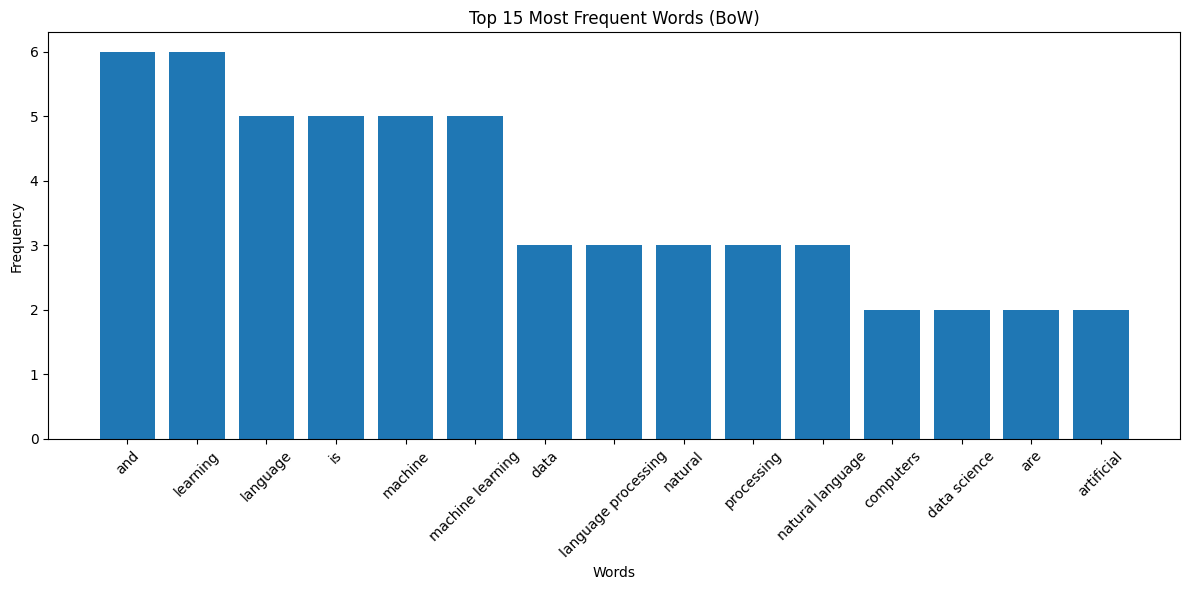


Document Similarity Matrix (Cosine Similarity):
        Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  Doc 10  \
Doc 1   1.000  0.320  0.603  0.426  0.455  0.746  0.000  0.135  0.405   0.213   
Doc 2   0.320  1.000  0.000  0.750  0.426  0.000  0.612  0.000  0.474   0.000   
Doc 3   0.603  0.000  1.000  0.000  0.000  0.707  0.000  0.000  0.149   0.471   
Doc 4   0.426  0.750  0.000  1.000  0.533  0.000  0.000  0.000  0.632   0.000   
Doc 5   0.455  0.426  0.000  0.533  1.000  0.107  0.000  0.539  0.539   0.000   
Doc 6   0.746  0.000  0.707  0.000  0.107  1.000  0.000  0.158  0.000   0.500   
Doc 7   0.000  0.612  0.000  0.000  0.000  0.000  1.000  0.000  0.000   0.000   
Doc 8   0.135  0.000  0.000  0.000  0.539  0.158  0.000  1.000  0.200   0.000   
Doc 9   0.405  0.474  0.149  0.632  0.539  0.000  0.000  0.200  1.000   0.000   
Doc 10  0.213  0.000  0.471  0.000  0.000  0.500  0.000  0.000  0.000   1.000   
Doc 11  0.123  0.144  0.000  0.144  0.492  0.144  0.000  0.3

In [10]:
# Bag-of-Words with scikit-learn CountVectorizer

# Initialize CountVectorizer
custom_stopwords = ['is', 'and', 'the', 'are', 'of', 'in', 'for', 'on']
vectorizer = CountVectorizer(
    lowercase=True,          # Convert to lowercase
    # stop_words='english',    # Remove common English stop words
    max_features=100,        # Limit vocabulary size
    ngram_range=(1, 2),      # (unigram and bigram)
    min_df=2
)

# Fit and transform documents
bow_matrix = vectorizer.fit_transform(processed_docs)

feature_names = vectorizer.get_feature_names_out()


print("BAG-OF-WORDS ANALYSIS")
print("=" * 50)
print(f"Vocabulary size: {len(feature_names)}")
print(f"Matrix shape: {bow_matrix.shape}")
print(f"Matrix density: {bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1]):.3f}")
print(processed_docs)
# Convert to dense array for visualization
bow_dense = bow_matrix.toarray()

# Create DataFrame for better visualization
bow_df = pd.DataFrame(bow_dense, columns=feature_names)
bow_df.index = [f"Doc {i+1}" for i in range(len(documents))]

print(f"\nFirst 10 features:")
print(bow_df.iloc[:, :10])

# Analyze vocabulary
print(f"\nVocabulary (first 20 words):")
print(list(feature_names[:20]))

# Word frequency analysis
word_freq = bow_matrix.sum(axis=0).A1  # Sum across documents
word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print(f"\nTop 15 most frequent words:")
print(word_freq_df.head(15))

# Visualize word frequencies
plt.figure(figsize=(12, 6))
top_words = word_freq_df.head(15)
plt.bar(top_words['word'], top_words['frequency'])
plt.title('Top 15 Most Frequent Words (BoW)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Document similarity using BoW
similarity_matrix = cosine_similarity(bow_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                           index=[f"Doc {i+1}" for i in range(len(documents))],
                           columns=[f"Doc {i+1}" for i in range(len(documents))])

print(f"\nDocument Similarity Matrix (Cosine Similarity):")
print(similarity_df.round(3))

BAG-OF-WORDS ANALYSIS
Vocabulary size: 31
Matrix shape: (8, 31)
Matrix density: 0.190
['i love machine learning and natural language processing', 'machine learning is a subset of artificial intelligence', 'natural language processing helps computers understand human language', 'deep learning is a powerful machine learning technique', 'python is great for machine learning and data science', 'text mining and natural language processing are related fields', 'artificial intelligence will transform many industries', 'data science combines statistics programming and domain knowledge']

First 10 features:
       artificial  combines  computers  data  deep  domain  fields  great  \
Doc 1           0         0          0     0     0       0       0      0   
Doc 2           1         0          0     0     0       0       0      0   
Doc 3           0         0          1     0     0       0       0      0   
Doc 4           0         0          0     0     1       0       0      0   
Doc 5    

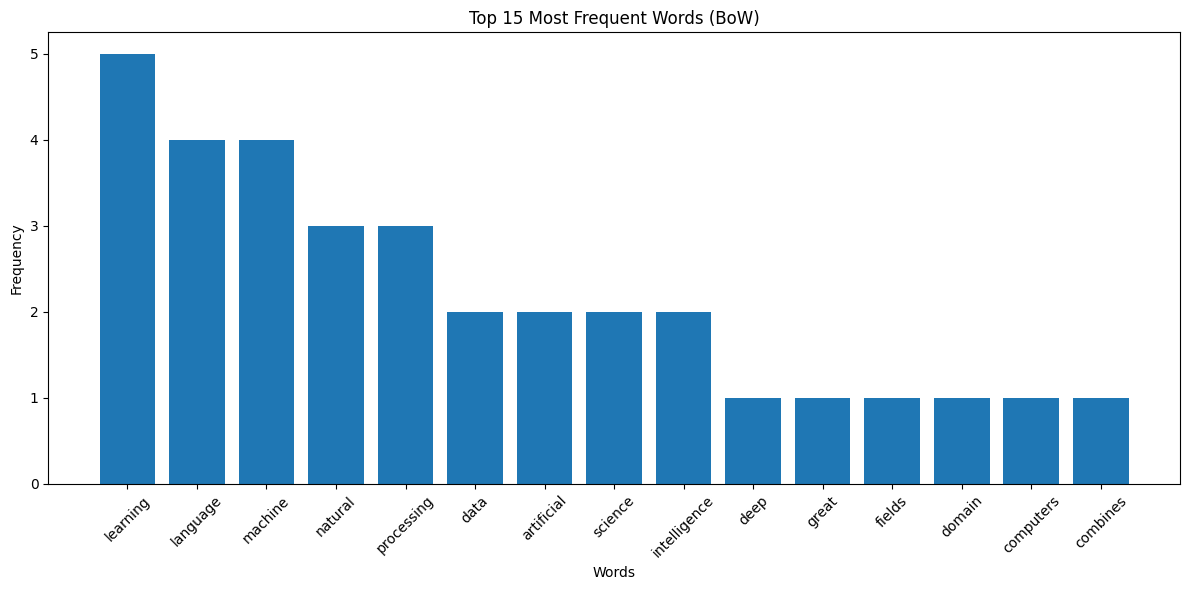


Document Similarity Matrix (Cosine Similarity):
       Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8
Doc 1  1.000  0.365  0.516  0.433  0.333  0.463  0.000  0.000
Doc 2  0.365  1.000  0.000  0.474  0.365  0.000  0.447  0.000
Doc 3  0.516  0.000  1.000  0.000  0.000  0.478  0.000  0.000
Doc 4  0.433  0.474  0.000  1.000  0.433  0.000  0.000  0.000
Doc 5  0.333  0.365  0.000  0.433  1.000  0.000  0.000  0.309
Doc 6  0.463  0.000  0.478  0.000  0.000  1.000  0.000  0.000
Doc 7  0.000  0.447  0.000  0.000  0.000  0.000  1.000  0.000
Doc 8  0.000  0.000  0.000  0.000  0.309  0.000  0.000  1.000
